In [169]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
from matplotlib.patches import Ellipse
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path3 = 's3://data/lat_lon_scalar.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dl = xr.open_zarr(store=store3, consolidated=True)

In [167]:
bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [99]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [100]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc')
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc')
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')
ANO12 = open_s3fs('moorings_/AON_WH_ADCP_BS3_2012_2013.nc')

In [108]:
scalar = open_s3fs('CREG12.L75-REF08_mesh_hgr.nc')

In [86]:
p_list = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.57541,79.37209),
          (5.48733,80.03876),
          (5.56333,79.44093)]
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (915, 157),
            (935, 143),
            (938, 144),
            (934, 141),
            (774, 344),
            (766, 358),
            (773, 346),
            (334, 978),
            (334, 978),
            (334, 978),
            (334, 978)]
c_list = ['c', 'orangered', 'g', 'r', 'm', 'y','tab:orange', 'tab:pink', 'limegreen', 'maroon', 'dodgerblue', 'gold', 'peru','deeppink']

In [102]:
# Barents sea
u13 = d13.UCUR.fillna(0).squeeze(axis=0)
v13 = d13.VCUR.fillna(0).squeeze(axis=0)
u15 = d15.UCUR.fillna(0).squeeze(axis=0)
v15 = d15.VCUR.fillna(0).squeeze(axis=0)
u17 = d17.UCUR.fillna(0).squeeze(axis=0)
v17 = d17.VCUR.fillna(0).squeeze(axis=0)

# Lofoten
ub = MB.u.isel(DEPTH=slice(19,-1)).fillna(0)
vb = MB.v.isel(DEPTH=slice(19,-1)).fillna(0)
uw = MW.u.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
vw = MW.v.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
un = MN.u.isel(DEPTH=slice(7,-1)).fillna(0)
vn = MN.v.isel(DEPTH=slice(7,-1)).fillna(0)
us = MS.u.isel(DEPTH=slice(8,-1)).fillna(0)
vs = MS.v.isel(DEPTH=slice(8,-1)).fillna(0)

# Yermark
u1 = y1.u.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
v1 = y1.v.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
u2 = y2.u.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
v2 = y2.v.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
u3 = y3.u.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)
v3 = y3.v.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)

# Beaufort
'sliter med å finne ut hvordan få gode oversiktlige'
u12 = ANO12.UCUR.fillna(0) #.isel(TIME=slice(),BINDEPTH=slice())
v12 = ANO12.VCUR.fillna(0)
u14 = ANO14.UCUR.isel(TIME=slice(166,-1),BINDEPTH=slice(0,10)).fillna(0)
v14 = ANO14.VCUR.isel(TIME=slice(166,-1),BINDEPTH=slice(0,10)).fillna(0)
u16 = ANO16.UCUR.isel(BINDEPTH=slice(6,11)).fillna(0)
v16 = ANO16.VCUR.isel(BINDEPTH=slice(6,11)).fillna(0)
u18 = ANO18.UCUR.isel().fillna(0)
v18 = ANO18.VCUR.isel().fillna(0)

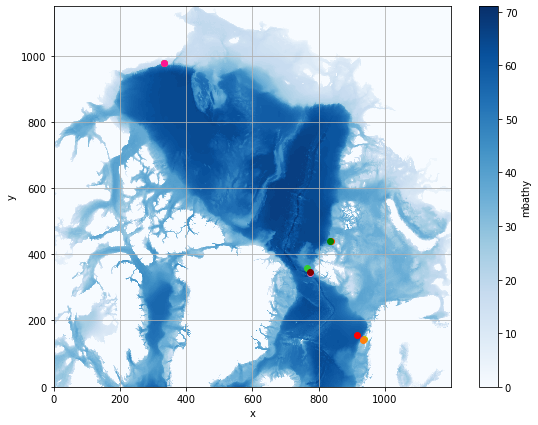

In [98]:
fig, ax = plt.subplots(figsize=(10,7))
bathym.plot(cmap=plt.get_cmap('Blues'))
for i,p in enumerate(moor_l):
    ax.plot(p[0], p[1], marker='o', color=c_list[i])
ax.grid('on')
ax.set_aspect('equal')

In [103]:
vel_l = [(u13,v13),(u15,v15), (u17,v17), (ub,vb),(uw,vw),(un,vn),(us,vs),(u1,v1),(u2,v2),(u3,v3),(u12,v12),(u14,v14),(u16,v16),(u18,v18)]

# Horizontal ellipses

- Not satisfied yet... something is off.. The major and minor axis are off approximate the same size, should not be. 
- Somthing off with code or is this just how the data is?

In [187]:
def ellipser_nDEPTH(u,v,depth):
    uvar = u.isel(nDEPTH=depth).var('TIME') - (u.isel(nDEPTH=depth).mean('TIME'))**2
    vvar = v.isel(nDEPTH=depth).var('TIME') - (v.isel(nDEPTH=depth).mean('TIME'))**2
    uv = u.isel(nDEPTH=depth).var('TIME')*v.isel(nDEPTH=depth).var('TIME') - u.isel(nDEPTH=depth).mean('TIME')*v.isel(nDEPTH=depth).mean('TIME')
    
    print('uvar: ',uvar.values,'vvar: ',vvar.values,'uv: ',uv.values)
    
    covm = np.array([[uvar,uv],
                [uv,vvar]],dtype=float)
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*0.1
    minor = np.sqrt(np.abs(values[1]))*0.1

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

In [197]:
def ellipser_DEPTH(u,v,depth):
    uvar = u.isel(DEPTH=depth).var('TIME') - (u.isel(DEPTH=depth).mean('TIME'))**2
    vvar = v.isel(DEPTH=depth).var('TIME') - (v.isel(DEPTH=depth).mean('TIME'))**2
    uv = u.isel(DEPTH=depth).var('TIME')*v.isel(DEPTH=depth).var('TIME') - u.isel(DEPTH=depth).mean('TIME')*v.isel(DEPTH=depth).mean('TIME')
    
    print('uvar: ',uvar.values,'vvar: ',vvar.values,'uv: ',uv.values)
    
    covm = np.array([[uvar,uv],
                [uv,vvar]],dtype=float)
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*1e2
    minor = np.sqrt(np.abs(values[1]))*1e2

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

In [160]:
def ellipser_BINDEPTH(u,v,depth):
    uvar = u.isel(nDEPTH=depth).var('TIME') - (u.isel(nDEPTH=depth).mean('TIME'))**2
    vvar = v.isel(nDEPTH=depth).var('TIME') - (v.isel(nDEPTH=depth).mean('TIME'))**2
    uv = u.isel(nDEPTH=depth).var('TIME')*v.isel(nDEPTH=depth).var('TIME') - u.isel(nDEPTH=depth).mean('TIME')*v.isel(nDEPTH=depth).mean('TIME')
    
    print('uvar: ',uvar,'vvar: ',vvar,'uv: ',uv)
    
    covm = np.array([[uvar,uv],
                [uv,vvar]],dtype=float)
    print(comv)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*0.001
    minor = np.sqrt(np.abs(values[1]))*0.001

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

In [192]:
vel

(<xarray.DataArray 'u' (DEPTH: 146, TIME: 8081)>
 dask.array<where, shape=(146, 8081), dtype=float64, chunksize=(146, 8081), chunktype=numpy.ndarray>
 Coordinates:
   * TIME     (TIME) datetime64[ns] 2014-09-10T12:59:59.999996648 ... 2015-08-...
   * DEPTH    (DEPTH) float64 19.79 24.73 29.68 34.63 ... 721.0 725.9 730.9 735.8
 Attributes:
     standard_name:  eastward_sea_water_velocity
     units:          m s-1
     long_name:      Absolute eastward sea water velocity,
 <xarray.DataArray 'v' (DEPTH: 146, TIME: 8081)>
 dask.array<where, shape=(146, 8081), dtype=float64, chunksize=(146, 8081), chunktype=numpy.ndarray>
 Coordinates:
   * TIME     (TIME) datetime64[ns] 2014-09-10T12:59:59.999996648 ... 2015-08-...
   * DEPTH    (DEPTH) float64 19.79 24.73 29.68 34.63 ... 721.0 725.9 730.9 735.8
 Attributes:
     standard_name:  northward_sea_water_velocity
     units:          m s-1
     long_name:      Absolute northward sea water velocity)

uvar:  0.01316019921682371 vvar:  0.01523150666351776 uv:  0.0002891393016997749
[[0.0131602  0.00028914]
 [0.00028914 0.01523151]]
vec:  [[-0.13570651 -0.99074908]
 [-0.99074908  0.13570651]] val:  [0.01527111 0.01312059]
Ellipse(xy=(766, 358), width=24.715267449889264, height=22.90903293668467, angle=-97.79947616217746)


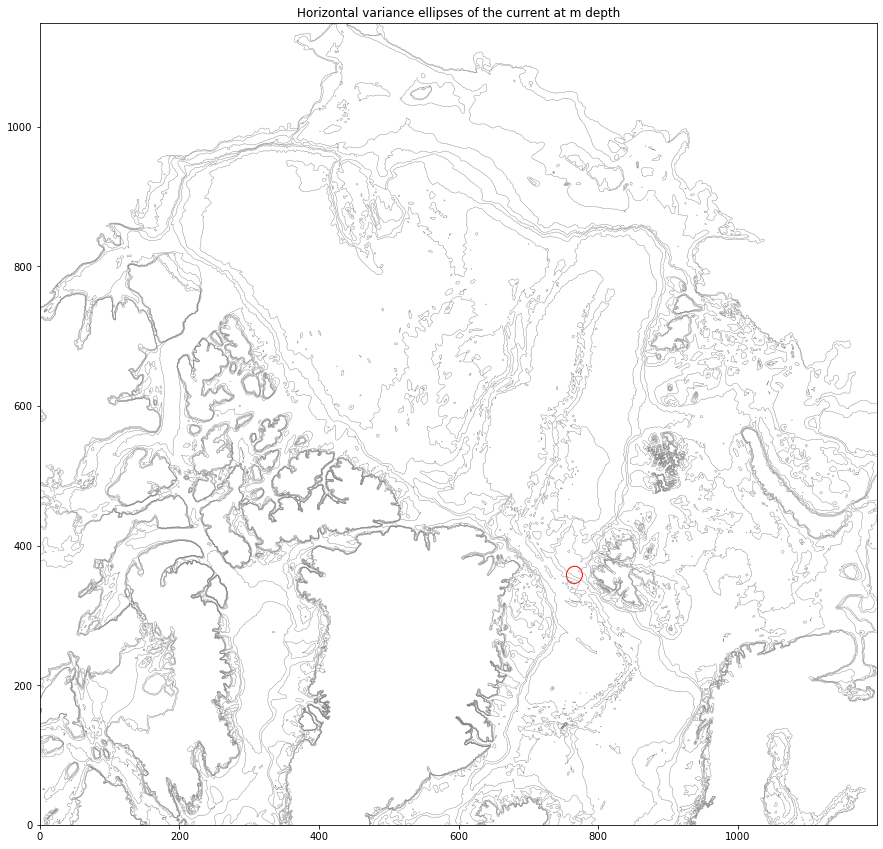

In [198]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(15,15))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

vel = vel_l[8]
m = moor_l[8]
depth = 100
u = vel[0]
v = vel[1]
y = m[0]
x = m[1]

#maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
maj_, min_, theta_ = ellipser_DEPTH(u,v,depth)
ellipse = Ellipse((y,x), 
        width = maj_*2, 
        height = min_*2,
        angle = theta_,
        facecolor = 'none',
        edgecolor='r'
                 )
print(ellipse)
ax.add_patch(ellipse)


ax.set_aspect('equal')
plt.show()

# Vertical PC

In [199]:
def PCz(data):
    cov = np.cov(data.T, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

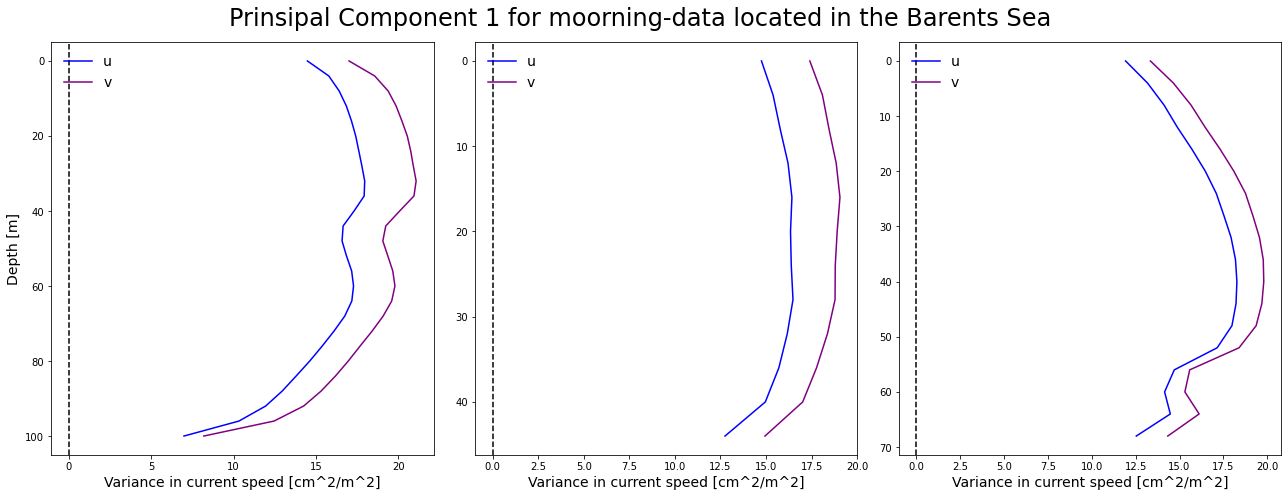

In [200]:
fig, axs = plt.subplots(1,3,figsize=(18,7))
yl = [(u13,v13),(u15,v15),(u17,v17)]
plt.suptitle('Prinsipal Component 1 for moorning-data located in the Barents Sea ', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, yl):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.nDEPTH*4, label= 'u', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.nDEPTH*4, label= 'v', color='purple')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

In [ ]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,4,figsize=(20,11))
yl = [(ub,vb),(uw,vw),(un,vn),(us,vs)]
plt.suptitle('Prinsipal Component 1 for moorning-data located in the Lofoten Basin', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, yl):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label= 'u', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label= 'v', color='purple')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper right")
fig.tight_layout()

In [ ]:
def PCz_yermark(data):
    cov = np.cov(data, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
yl = [(u1,v1),(u2,v2),(u3,v3)]
plt.suptitle('Prinsipal Component 1 for moorning-data located at Yermark shelf', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, yl):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz_yermark(U)
    valv, vecv = PCz_yermark(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label='u', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label='v', color='purple')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,11))
ANO = [(u12,v12),(u14,v14),(u16,v16),(u18,v18)]
plt.suptitle('Prinsipal Component 1 for moorning-data located at Beaufort sea', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, yl):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.BINDEPTH, label='u', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.BINDEPTH, label='v', color='purple')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

# Vertical PC parallell and orthogonal

In [144]:
#glamt: horizontal scale factors for latitude at the mid point og griddcell
# gphit: horizontal scale factors --''--
zonal_ = scalar.glamt.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)
merd_ = scalar.gphit.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)

In [150]:
d_hbx = bathym.isel(y=slice(0,1149)).diff(dim='x')
d_hbx = d_hbx.squeeze(axis=0)
d_hby = bathym.isel(x=slice(0,1199)).diff(dim='y')
d_hby = d_hby.squeeze(axis=0)

d_hbxg = d_hbx.rolling(x= 10,).mean()
d_hbyg = d_hby.rolling(y= 10,).mean()

len_batg = np.sqrt((d_hbxg/zonal_)**2 + (d_hbyg/merd_)**2)

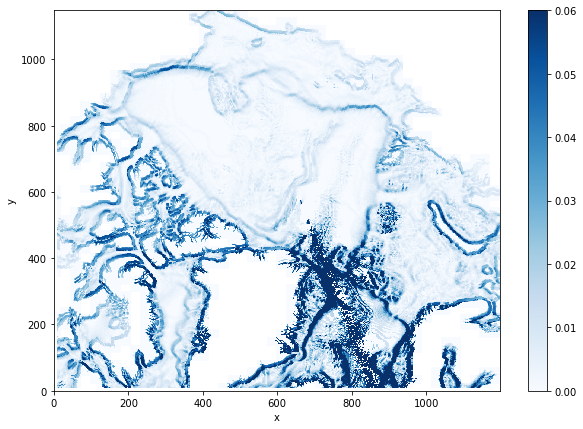

In [156]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,1,figsize=(10,7))
c = len_batg.plot(vmin=0, vmax=0.06, add_colorbar=False, cmap=plt.get_cmap('Blues'))
ax.set_aspect('equal')
fig.colorbar(c)